In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
df=pd.read_csv("/content/creditcard.csv")
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0


In [ ]:
df.tail(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
223855,143551.0,-0.995266,0.689360,-0.129920,-1.019210,-0.004685,-0.737544,1.442358,0.007701,-0.191575,...,-0.038218,-0.128516,0.067555,-0.020188,-0.496044,0.137714,-0.423308,-0.157237,123.50,0.0
223856,143552.0,2.072290,-0.059782,-1.128102,0.382643,-0.078541,-1.131168,0.177014,-0.321608,0.562317,...,-0.299667,-0.732141,0.322664,-0.112296,-0.281154,0.205301,-0.071423,-0.061553,1.98,0.0
223857,143552.0,1.863110,-0.366371,-0.058167,1.266312,-0.528037,0.277019,-0.749884,0.166159,1.152601,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object

In [ ]:
df.shape

(223858, 31)

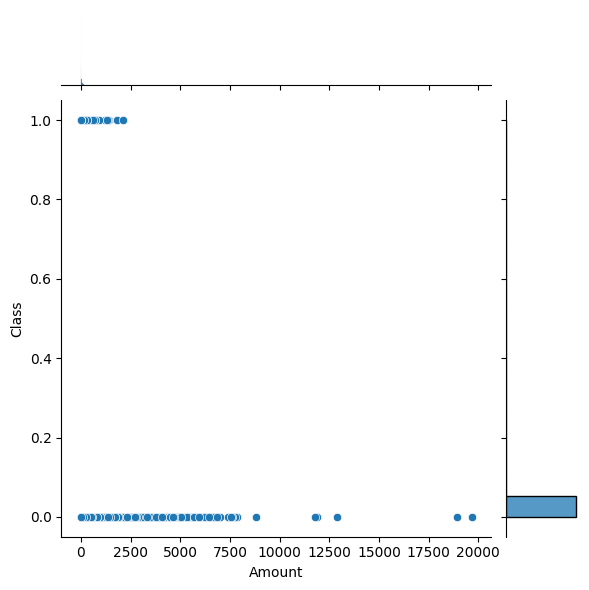

In [ ]:
sns.jointplot(data=df,x='Amount',y='Class')

In [ ]:
from sklearn.preprocessing import RobustScaler

rbs = RobustScaler()

df_small = df[['Time','Amount']]
df_small = pd.DataFrame(rbs.fit_transform(df_small))

df_small.columns = ['scaled_time','scaled_amount']
df = pd.concat([df,df_small],axis=1)

df.drop(['Time','Amount'],axis=1,inplace=True)

df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_time,scaled_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0,-1.009636,1.706964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0,-1.009636,-0.279919
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0,-1.009622,4.804192
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0,-1.009622,1.353753
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0,-1.009608,0.630156


In [ ]:
df['Class'].unique()

array([ 0.,  1., nan])

In [ ]:
df['Class'].value_counts()

0.0    223442
1.0       415
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

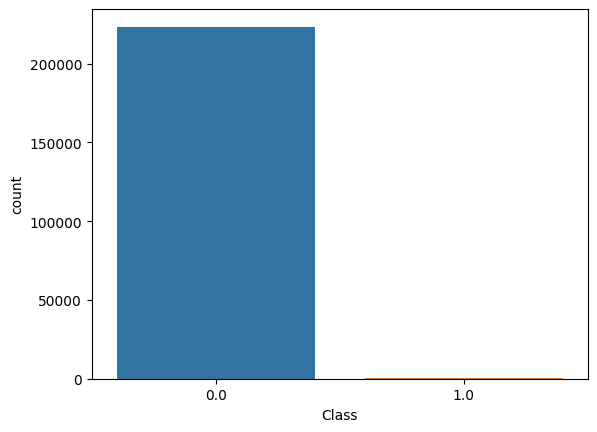

In [ ]:
sns.countplot(x='Class',data=df)

In [ ]:
non_fraud = df[df['Class']==0]
fraud = df[df['Class']==1]

non_fraud = non_fraud.sample(frac=1)

non_fraud = non_fraud[:415]

new_df = pd.concat([non_fraud,fraud])
new_df = new_df.sample(frac=1)
new_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_time,scaled_amount
14338,1.125336,1.130146,-0.962975,2.675688,0.990075,-0.243318,0.316192,0.122960,-1.143343,-0.369909,...,-0.521934,-0.112376,-0.592077,0.520791,0.043354,0.015159,0.063612,1.0,-0.655216,-0.265450
143335,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,-4.684952,-8.537758,...,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,1.0,0.179175,3.103854
151008,-26.457745,16.497472,-30.177317,8.904157,-17.892600,-1.227904,-31.197329,-11.438920,-9.462573,-22.187089,...,3.460893,0.896538,0.254836,-0.738097,-0.966564,-7.263482,-1.324884,1.0,0.305702,-0.302772
18809,0.923764,0.344048,-2.880004,1.721680,-3.019565,-0.639736,-3.801325,1.299096,0.864065,-2.895252,...,1.481271,0.725266,0.176960,-1.815638,-0.536517,0.489035,-0.049729,1.0,-0.594454,0.093442
154670,-2.296987,4.064043,-5.957706,4.680008,-2.080938,-1.463272,-4.490847,1.029246,-1.593249,-8.993811,...,0.975398,-0.625530,-0.535181,0.247435,0.160400,0.969582,0.335041,1.0,0.418987,1.090061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138592,1.231786,0.035531,0.658018,1.001781,0.027738,1.036380,-0.598182,0.235011,0.642996,-0.151911,...,0.480786,-0.240716,-1.269608,0.659010,-0.129435,0.090491,0.019959,0.0,0.143756,-0.302772
149869,-1.108478,3.448953,-6.216972,3.021052,-0.529901,-2.551375,-2.001743,1.092432,-0.836098,-4.095649,...,1.144170,0.208559,-0.295497,-0.690232,-0.364749,0.229327,0.208830,1.0,0.274060,-0.072887
17480,-30.552380,16.713389,-31.103685,6.534984,-22.105532,-4.977692,-20.371514,20.007208,-3.565738,-7.731071,...,-2.288686,-1.460544,0.183179,2.208209,-0.208824,1.232636,0.356660,1.0,-0.608812,1.035835
75355,-1.657683,-0.426294,1.687198,-1.454421,-2.383477,1.305648,0.658390,0.543973,-1.068176,-0.674915,...,0.460901,-0.059376,0.079649,0.353229,-0.323458,0.023944,-0.176926,0.0,-0.228743,4.754834


In [ ]:
new_df['Class'].value_counts()

1.0    415
0.0    415
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

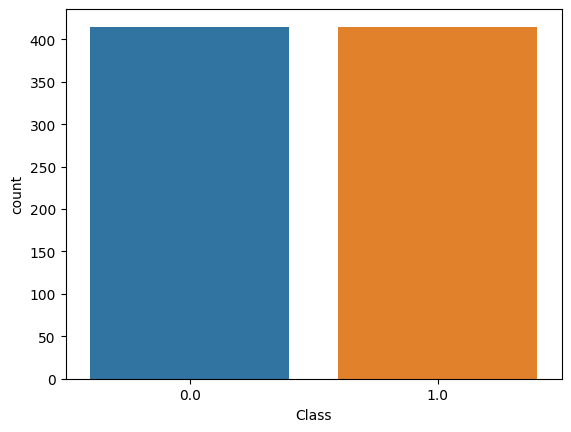

In [ ]:
sns.countplot(x='Class',data=new_df)

In [ ]:
x = new_df.drop('Class',axis=1)
y = new_df['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print(classification_report(y_test,y_pred))
print('\n\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print('accuracy is --> ',accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95        74
         1.0       0.98      0.93      0.96        92

    accuracy                           0.95       166
   macro avg       0.95      0.95      0.95       166
weighted avg       0.95      0.95      0.95       166




[[72  2]
 [ 6 86]]


accuracy is -->  0.9518072289156626


In [ ]:
print(model.predict([[180000,-0.602314563,-0.432158478213,-0.1215213179,1.0004321564,0.78636879,-1.1987514595,-2.30988777,-0.4367094890,-0.050342686840,-0.49108000000,0.145533768880,-0.0074232461231,-2.17064090772134,0.765472093545467,0.296571801648159,-0.337219465633122,0.2247470250116,-0.646453207369072,1.11445316601113,-0.52088087706078,0.384885858904982,-0.381157662950846,0.857518067563406,-0.364995855374343,-1.33716409167768,1.98308821128709,0.173042387163378,1.58897627071013,36.8]]))

[1.]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

y_pred = dt_model.predict(x_test)

print(classification_report(y_test,y_pred))
print('\n\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print('accuracy is --> ',accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90        74
         1.0       0.91      0.92      0.92        92

    accuracy                           0.91       166
   macro avg       0.91      0.91      0.91       166
weighted avg       0.91      0.91      0.91       166




[[66  8]
 [ 7 85]]


accuracy is -->  0.9096385542168675


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)

pred=rf_model.predict(x_test)

print(classification_report(y_test,pred))
print('\n\n')
print(confusion_matrix(y_test,pred))
print('\n')
print('accuracy is --> ',accuracy_score(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94        74
         1.0       0.99      0.90      0.94        92

    accuracy                           0.94       166
   macro avg       0.94      0.94      0.94       166
weighted avg       0.94      0.94      0.94       166




[[73  1]
 [ 9 83]]


accuracy is -->  0.9397590361445783
